In [1]:
import numpy as np
import seaborn as sns

In [21]:
import pandas as pd
fp1 = "2017_accidents_tipus_gu_bcn_.xlsx"
accidents_BCN = pd.read_excel(fp1)

In [4]:
accidents_BCN.head()

,Número d'expedient,Codi districte,Nom districte,Codi barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia setmana,...,Mes de any,Nom mes,Dia de mes,Hora de dia,Descripció torn,Descripció tipus accident,Coordenada UTM (X),Coordenada UTM (Y),Londitud,Latitud
0,2017S009418,-1,Desconegut,-1,Desconegut,-1,Francesc Ferrer i Guàrdia / Sant Jordi ...,Desconegut,Dilluns,Dl,...,11,Novembre,13,16,Tarda,Abast,428572.07,4580031.06,"2,144821","41,366779"
1,2017S008852,-1,Desconegut,-1,Desconegut,-1,Valldaura ...,284-286,Dijous,Dj,...,10,Octubre,26,7,Matí,Col.lisió fronto-lateral,431806.6,4588044.41,"2,182588","41,439233"
2,2017S001023,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,NAVAS DE TOLOSA / Av Meridiana ...,0203 0205,Dimarts,Dm,...,2,Febrer,7,15,Tarda,Col.lisió lateral,"432116,48","4585382,72","2,186591","41,41528"
3,2017S009198,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant / Ruiz de Padrón ...,0090 0090,Dimarts,Dm,...,11,Novembre,7,14,Tarda,Col.lisió fronto-lateral,"431940,75","4585401,48","2,184483","41,415436"
4,2017S006546,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret ...,0330 0332,Dijous,Dj,...,7,Juliol,27,14,Tarda,Abast,"431537,32","4585363,11","2,179666","41,41506"


In [6]:
corr = accidents_BCN.corr()
corr

,Codi districte,Codi barri,Codi carrer,NK Any,Mes de any,Dia de mes,Hora de dia
Codi districte,1.000000,0.987637,0.159871,NaN,0.008895,-0.010874,-0.014116
Codi barri,0.987637,1.000000,0.163730,NaN,0.011285,-0.012072,-0.014088
Codi carrer,0.159871,0.163730,1.000000,NaN,0.059760,0.014360,-0.025352
NK Any,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes de any,0.008895,0.011285,0.059760,NaN,1.000000,0.020487,-0.000820
Dia de mes,-0.010874,-0.012072,0.014360,NaN,0.020487,1.000000,0.012878
Hora de dia,-0.014116,-0.014088,-0.025352,NaN,-0.000820,0.012878,1.000000


In [7]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [8]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

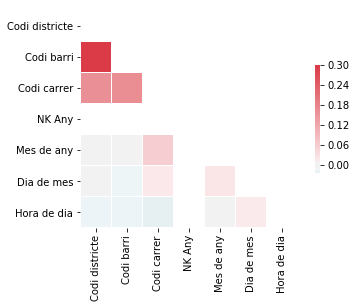

In [9]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
import pandas as pd

excel_file ='2018_accidents_persones_gu_bcn_.csv'

accidents_BCN = pd.read_csv(excel_file)

accidents_BCN.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_ any', 'Nom_mes', 'Dia_mes', 'Descripcio_torn', 'Hora_dia',
       'Descripcio_causa_vianant', 'Desc_Tipus_vehicle_implicat',
       'Descripcio_sexe', 'Edat', 'Descripcio_tipus_persona',
       'Descripcio_situacio', 'Descripcio_victimitzacio', 'Coordenada_UTM_X',
       'Coordenada_UTM_Y', 'Longitud', 'Latitud'],
      dtype='object')

In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas

lm = smf.ols(formula='Hora_dia ~ Edat', data=accidents_BCN).fit() 

lm.params

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Hora_dia   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9305
Date:                Fri, 10 May 2019   Prob (F-statistic):              0.674
Time:                        18:22:57   Log-Likelihood:                -36591.
No. Observations:               11854   AIC:                         7.338e+04
Df Residuals:                   11754   BIC:                         7.412e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.4737      1

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

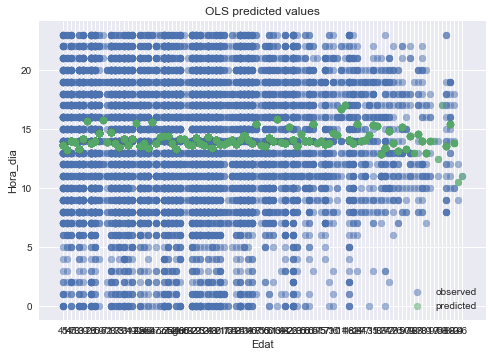

In [14]:
# Trazar los valores observados
plt.scatter(accidents_BCN['Edat'], accidents_BCN['Hora_dia'], alpha=0.5, label='observed')
# Trazar los valores predichos
plt.scatter(accidents_BCN['Edat'], lm.predict(), alpha=0.5, label='predicted')
# Definir los elementos representativos del gráfico de la regresión lineal
plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Edat')
plt.ylabel('Hora_dia')
plt.show()

In [5]:
fp2 = "mesBCNI_SHP/mesBCN1.shp"

In [6]:
import pandas as pd
import geopandas as gpd
import dateutil
from shapely.geometry import shape,Point,Polygon,mapping
niveles_granularidad = gpd.read_file(fp2)

In [7]:
niveles_granularidad.head()

,IDTRAM,TVLDIA,TVLVES,TVLNIT,TVLDEN,TFLDIA,TFLVES,TFLNIT,TFLDEN,TALDIA,...,TOTDIA,TOTVES,TOTNIT,TOTDEN,POBTOT,POBINT,POBEXT,IDAGLO,CODI_INE,geometry
0,1,69,69,64,72,0,0,0,0,0,...,69,69,64,72,419,0,419,BCN1,08019,LINESTRING (431811.3190171953 4586053.80823699...
1,2,63,63,56,65,0,0,0,0,0,...,63,63,56,65,225,0,225,BCN1,08019,LINESTRING (431945.6290804072 4586034.77719028...
2,3,63,63,56,65,0,0,0,0,0,...,63,63,56,65,76,0,76,BCN1,08019,LINESTRING (431856.8482942577 4585949.03772508...
3,4,58,58,51,60,0,0,0,0,0,...,58,58,51,60,161,0,161,BCN1,08019,LINESTRING (431649.5981430262 4585971.31932891...
4,5,67,67,62,70,0,0,0,0,0,...,67,67,62,70,243,0,243,BCN1,08019,LINESTRING (431437.5488453258 4586107.35115096...


In [9]:
niveles_granularidad['TOTDIA'].count()

16742

In [10]:
type(niveles_granularidad)

geopandas.geodataframe.GeoDataFrame

In [11]:
niveles_granularidad['TOTDIA'].nunique()

60

In [13]:
niveles_granularidad.TVLDEN.unique()

array([72, 65, 60, 70, 77, 61, 69, 71, 66, 64, 62, 59, 63, 52, 56, 73, 58,
       67, 68, 74,  0, 57, 75, 53, 54, 78, 48, 50, 55, 76, 49, 45, 47, 51,
       80, 81, 43, 46, 41, 23, 40, 44, 28, 35, 30, 38, 31, 37, 26, 25, 27,
       42, 29, 32, 39, 33, 36, 24, 79, 34], dtype=int64)

In [15]:
niveles_granularidad.crs

{'init': 'epsg:25831'}

In [16]:
niveles_granularidad_rep = niveles_granularidad.to_crs({'init': 'epsg:4326'})

In [17]:
niveles_granularidad_rep.crs

{'init': 'epsg:4326'}